In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from deap import base, creator, tools, algorithms
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import random
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Crop_Yield_Prediction.csv')
data

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,Yield
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice,7000
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice,5000
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice,7000
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice,7000
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice,120000
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee,1000
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee,800
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee,560
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee,1500


In [3]:
data.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,Yield
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice,7000
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice,5000
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice,7000
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice,7000
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice,120000


In [4]:
data.tail()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,Yield
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee,1000
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee,800
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee,560
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee,1500
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,Coffee,1400


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
 8   Yield        2200 non-null   int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 154.8+ KB


In [6]:
data.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Yield
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,2689.228182
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,3710.361267
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,2.000000
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,950.000000
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,1825.000000
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,3500.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,120000.000000


In [7]:
data.shape

(2200, 9)

In [8]:
for i in data.columns:
    print(i)
    print(data[i].unique())
    print()

Nitrogen
[ 90  85  60  74  78  69  94  89  68  91  93  77  88  76  67  83  98  66
  97  84  73  92  95  99  63  62  64  82  79  65  75  71  72  70  86  61
  81  80 100  87  96  40  23  39  22  36  32  58  59  42  28  43  27  50
  25  31  26  54  57  49  46  38  35  52  44  24  29  20  56  37  51  41
  34  30  33  47  53  45  48  13   2  17  12   6  10  19  11  18  21  16
   9   1   7   8   0   3   4   5  14  15  55 105 108 118 101 106 109 117
 114 110 112 111 102 116 119 107 104 103 120 113 115 133 136 126 121 129
 122 140 131 135 123 125 139 132 127 130 134]

Phosphorus
[ 42  58  55  35  37  53  54  46  56  50  48  38  45  40  59  41  47  49
  51  57  39  43  44  60  52  36  72  67  73  70  62  74  66  63  71  78
  80  68  65  77  76  79  61  64  69  75  24  18  26  27  25  21  30  11
   5  10   7  20  22  15  23   8  16  29  17   6  19  13   9  14  28  94
  95  92  89  88  87  85  86  83  91  81  84  90  82  93  33  31  34  32
 130 144 123 125 131 140 122 134 145 139 141 138 136 132 

In [9]:
print(data["Crop"].value_counts())

Rice           100
Maize          100
Jute           100
Cotton         100
Coconut        100
Papaya         100
Orange         100
Apple          100
Muskmelon      100
Watermelon     100
Grapes         100
Mango          100
Banana         100
Pomegranate    100
Lentil         100
Blackgram      100
MungBean       100
MothBeans      100
PigeonPeas     100
KidneyBeans    100
ChickPea       100
Coffee         100
Name: Crop, dtype: int64


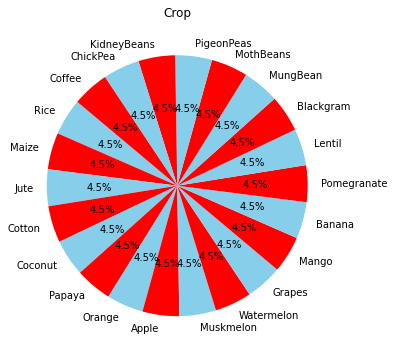

In [10]:
crop = data['Crop'].value_counts()
crop_values = crop.values
labels = crop.index
plt.figure(figsize=(8, 6))
plt.pie(crop, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'red'])
plt.title('Crop')
plt.show()

In [11]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [12]:
X = data.drop('Crop', axis=1)  
y = data['Crop']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.7,random_state=42)

In [13]:
X

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Yield
0,90,42,43,20.879744,82.002744,6.502985,202.935536,7000
1,85,58,41,21.770462,80.319644,7.038096,226.655537,5000
2,60,55,44,23.004459,82.320763,7.840207,263.964248,7000
3,74,35,40,26.491096,80.158363,6.980401,242.864034,7000
4,78,42,42,20.130175,81.604873,7.628473,262.717340,120000
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,1000
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,800
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,560
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,1500


In [14]:
y

0         Rice
1         Rice
2         Rice
3         Rice
4         Rice
         ...  
2195    Coffee
2196    Coffee
2197    Coffee
2198    Coffee
2199    Coffee
Name: Crop, Length: 2200, dtype: object

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(data['Crop'])

LabelEncoder()

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

def create_individual():
    n_estimators = random.randint(10, 200)
    max_depth = random.randint(1, 20)
    return [n_estimators, max_depth]

def evaluate(individual):
    n_estimators, max_depth = individual
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    return (accuracy,)

toolbox = base.Toolbox()
toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=10, up=200, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)

def run_ga():
    population = toolbox.population(n=10)
    generations = 10
    cx_prob = 0.7
    mut_prob = 0.2

    for gen in range(generations):
        fitnesses = list(map(toolbox.evaluate, population))
        for ind, fit in zip(population, fitnesses):
            ind.fitness.values = fit

        offspring = toolbox.select(population, len(population))
        offspring = list(map(toolbox.clone, offspring))

        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < cx_prob:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < mut_prob:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        invalid_individuals = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = list(map(toolbox.evaluate, invalid_individuals))
        for ind, fit in zip(invalid_individuals, fitnesses):
            ind.fitness.values = fit

        population[:] = offspring

    best_individual = tools.selBest(population, 1)[0]
    return best_individual

best_individual = run_ga()

best_n_estimators, best_max_depth = best_individual

In [18]:
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNeighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC()
}

In [19]:
for name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)                   
    y_pred = clf.predict(X_test_scaled)            
    accuracy = accuracy_score(y_test, y_pred)       
    print(f'{name} Accuracy: {accuracy:.4f}')    
    print(classification_report(y_test, y_pred))  

Random Forest Accuracy: 0.9877
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        72
      Banana       1.00      1.00      1.00        63
   Blackgram       0.99      0.99      0.99        67
    ChickPea       1.00      1.00      1.00        75
     Coconut       1.00      1.00      1.00        71
      Coffee       1.00      1.00      1.00        68
      Cotton       0.96      1.00      0.98        67
      Grapes       1.00      1.00      1.00        69
        Jute       0.86      1.00      0.92        65
 KidneyBeans       1.00      1.00      1.00        79
      Lentil       0.97      0.99      0.98        68
       Maize       1.00      0.96      0.98        72
       Mango       1.00      1.00      1.00        65
   MothBeans       0.97      0.96      0.97        77
    MungBean       1.00      1.00      1.00        65
   Muskmelon       1.00      1.00      1.00        72
      Orange       1.00      1.00      1.00       

In [20]:
import warnings
import time
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)  
model = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)
start = time.time()
model.fit(X_train_scaled, y_train)
end = time.time()
print("Run Time: %f" % (end - start))
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print(classification_report(y_test, y_pred))

Run Time: 0.251781
Accuracy:  0.990909090909091
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        72
      Banana       1.00      1.00      1.00        63
   Blackgram       1.00      1.00      1.00        67
    ChickPea       1.00      1.00      1.00        75
     Coconut       1.00      1.00      1.00        71
      Coffee       1.00      1.00      1.00        68
      Cotton       0.97      1.00      0.99        67
      Grapes       1.00      1.00      1.00        69
        Jute       0.87      1.00      0.93        65
 KidneyBeans       1.00      1.00      1.00        79
      Lentil       0.97      1.00      0.99        68
       Maize       1.00      0.97      0.99        72
       Mango       1.00      1.00      1.00        65
   MothBeans       1.00      0.97      0.99        77
    MungBean       1.00      1.00      1.00        65
   Muskmelon       1.00      1.00      1.00        72
      Orange       1.00      1.00

In [21]:
import pickle
pickle.dump(model,open("model.pickle","wb"))
pickle.dump(scaler,open("scaler.pickle","wb"))
pickle.dump(label_encoder,open("label_encoder.pickle","wb"))

In [22]:
# Get unique values in the crop label column
unique_crops = data['Crop'].unique()

# Display unique crop types
print("Unique crop types:", unique_crops)

# Count of unique crop types
num_unique_crops = len(unique_crops)
print("Number of unique crop types:", num_unique_crops)


Unique crop types: ['Rice' 'Maize' 'ChickPea' 'KidneyBeans' 'PigeonPeas' 'MothBeans'
 'MungBean' 'Blackgram' 'Lentil' 'Pomegranate' 'Banana' 'Mango' 'Grapes'
 'Watermelon' 'Muskmelon' 'Apple' 'Orange' 'Papaya' 'Coconut' 'Cotton'
 'Jute' 'Coffee']
Number of unique crop types: 22
